# **EDA (Análisis exploratorio de los datos)**

### Importación de Librerías

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import calendar
from wordcloud import WordCloud, STOPWORDS

## **Ingesta de Datos limpios**

In [ ]:
# Leer el archivo .csv que fue exportado de la limpieza previa
df_clean = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PI_MLOps/movies_clean.csv')

## **Descripción general de los datos**

In [ ]:
# Imprimir las primeras 5 filas de "df_clean"
df_clean.head()

,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,...,tagline,title,vote_average,vote_count,languages,director,actors,overview_clean,release_year,return
0,30000000,"animation,comedy,family",862,en,led by woody andys toys live happily in his ro...,21.946943,Pixar Animation Studios,United States of America,1995-10-30,373554033.0,...,NaN,Toy Story,7.7,5415.0,English,John Lasseter,"Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wal...",led by woody andys toy live happily in his roo...,1995,12.451801
1,65000000,"adventure,fantasy,family",8844,en,when siblings judy and peter discover an encha...,17.015539,"TriStar Pictures,Teitler Film,Interscope Commu...",United States of America,1995-12-15,262797249.0,...,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,"English,Français",Joe Johnston,"Robin Williams,Jonathan Hyde,Kirsten Dunst,Bra...",when sibling judy and peter discover an enchan...,1995,4.043035
2,0,"romance,comedy",15602,en,a family wedding reignites the ancient feud be...,11.712900,"Warner Bros.,Lancaster Gate",United States of America,1995-12-22,0.0,...,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,English,Howard Deutch,"Walter Matthau,Jack Lemmon,Ann-Margret,Sophia ...",a family wedding reignites the ancient feud be...,1995,0.000000
3,16000000,"comedy,drama,romance",31357,en,cheated on mistreated and stepped on the women...,3.859495,Twentieth Century Fox Film Corporation,United States of America,1995-12-22,81452156.0,...,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,English,Forest Whitaker,"Whitney Houston,Angela Bassett,Loretta Devine,...",cheated on mistreated and stepped on the woman...,1995,5.090760
4,0,comedy,11862,en,just when george banks has recovered from his ...,8.387519,"Sandollar Productions,Touchstone Pictures",United States of America,1995-02-10,76578911.0,...,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,English,Charles Shyer,"Steve Martin,Diane Keaton,Martin Short,Kimberl...",just when george bank ha recovered from his da...,1995,0.000000


In [ ]:
# Imprimir las últimas 5 filas de "df_clean"
df_clean.tail()

,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,...,tagline,title,vote_average,vote_count,languages,director,actors,overview_clean,release_year,return
45341,0,"drama,action,romance",30840,en,yet another version of the classic epic with e...,5.683753,"Westdeutscher Rundfunk (WDR),Working Title Fil...","Canada,Germany,United Kingdom,United States of...",1991-05-13,0.0,...,NaN,Robin Hood,5.7,26.0,English,John Irvin,"Patrick Bergin,Uma Thurman,David Morrissey,Jür...",yet another version of the classic epic with e...,1991,0.0
45342,0,drama,111109,tl,an artist struggles to finish his work while a...,0.178241,Sine Olivia,Philippines,2011-11-17,0.0,...,NaN,Century of Birthing,9.0,3.0,NaN,Lav Diaz,"Angel Aquino,Perry Dizon,Hazel Orencio,Joel To...",an artist struggle to finish his work while a ...,2011,0.0
45343,0,"action,drama,thriller",67758,en,when one of her hits goes wrong a professional...,0.903007,American World Pictures,United States of America,2003-08-01,0.0,...,A deadly game of wits.,Betrayal,3.8,6.0,English,Mark L. Lester,"Erika Eleniak,Adam Baldwin,Julie du Page,James...",when one of her hit go wrong a professional as...,2003,0.0
45344,0,drama,227506,en,in a small town live two brothers one a minist...,0.003503,Yermoliev,Russia,1917-10-21,0.0,...,NaN,Satan Triumphant,0.0,0.0,NaN,Yakov Protazanov,"Iwan Mosschuchin,Nathalie Lissenko,Pavel Pavlo...",in a small town live two brother one a ministe...,1917,0.0
45345,0,"music,documentary",461257,en,50 years after decriminalisation of homosexual...,0.163015,NaN,United Kingdom,2017-06-09,0.0,...,NaN,Queerama,0.0,0.0,English,Daisy Asquith,NaN,50 year after decriminalisation of homosexuali...,2017,0.0


In [ ]:
# Lista con los nombres de todos los campos presentes en "df_clean"
df_clean.columns

Index(['budget', 'genres', 'id', 'original_language', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'languages', 'director', 'actors', 'overview_clean',
       'release_year', 'return'],
      dtype='object')

In [ ]:
# Mostrar información del número de columnas, filas, tipos de datos y valores faltantes presentes en "df_clean"
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45346 entries, 0 to 45345
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                45346 non-null  int64  
 1   genres                44900 non-null  object 
 2   id                    45346 non-null  int64  
 3   original_language     45335 non-null  object 
 4   overview              45346 non-null  object 
 5   popularity            45346 non-null  float64
 6   production_companies  33557 non-null  object 
 7   production_countries  39138 non-null  object 
 8   release_date          45346 non-null  object 
 9   revenue               45346 non-null  float64
 10  runtime               45327 non-null  float64
 11  status                45266 non-null  object 
 12  tagline               20383 non-null  object 
 13  title                 45346 non-null  object 
 14  vote_average          45346 non-null  float64
 15  vote_count         

## **Análisis Univariable**

Esto nos permite explorar las características de una variable individualmente y comprender su distribución, centralidad, dispersión, valores atípicos y valores faltantes.

### Variables numéricas

Algunas variables numéricas relevantes en el conjunto de datos que se analizaran son:  ```popularity```, ```revenue```, ```runtime```, ```vote_average```, ```vote_count```

#### Atributo ```popularity```

La columna ```popularity``` contiene valores numéricos que representan el puntaje de popularidad de cada película, asignado por TMDB (TheMoviesData).

In [ ]:
# Establecer el formato de visualización de los datos de punto flotante
pd.set_option('display.float_format', '{:.4f}'.format)
# Mostrar un resumen estadístico de la columna "popularity" con el formato establecido
df_clean.popularity.describe()

count   45346.0000
mean        2.9261
std         6.0108
min         0.0000
25%         0.3887
50%         1.1302
75%         3.6893
max       547.4883
Name: popularity, dtype: float64

In [ ]:
# Convertir los valores numéricos en valores de cadena de texto y calcular la longitud de cada cadena
longitudes = df_clean.popularity.astype(str).str.len()
# Obtener la longitud máxima de la columna
longitud_maxima = longitudes.max()
longitud_maxima

10

In [ ]:
# Establecer el formato de visualización de los datos de punto flotante
pd.set_option('display.float_format', '{:.6f}'.format)
# Mostrar un conteo de los valores de popularidad que más se repiten en el atributo "popularity"
df_clean.popularity.value_counts()

0.000001    56
0.000308    42
0.000000    40
0.000220    39
0.001177    38
            ..
1.756955     1
2.000936     1
2.365103     1
0.815137     1
0.163015     1
Name: popularity, Length: 43719, dtype: int64

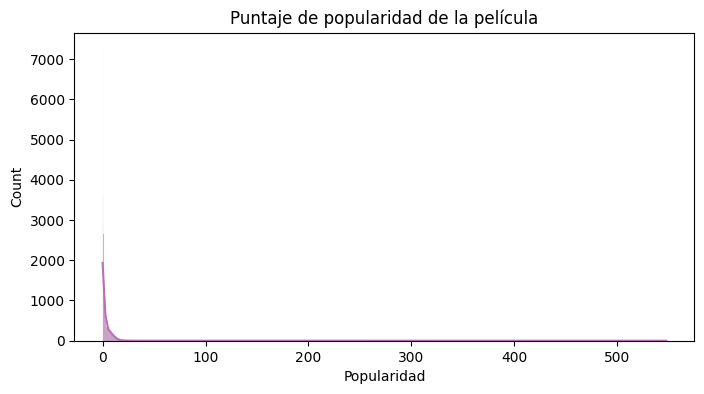

In [ ]:
# Visualizar la distribucion de los datos
fig, ax = plt.subplots(figsize = (8,4))
sns.histplot(data = df_clean, x = 'popularity', kde = True, color = '#BE6DB7')
plt.title("Puntaje de popularidad de la película", fontsize = 12)
plt.xlabel("Popularidad", fontsize = 10)
plt.ylabel("Count", fontsize = 10)
plt.show()

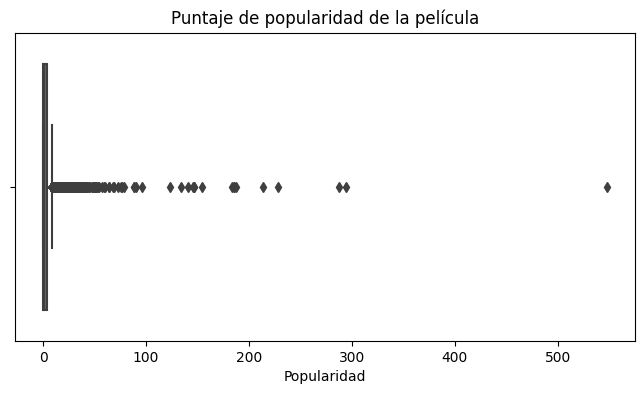

In [ ]:
# Identificar outliers con boxplot
fig, ax = plt.subplots(figsize = (8, 4))
sns.boxplot(x = df_clean.popularity)
plt.title("Puntaje de popularidad de la película", fontsize = 12)
plt.xlabel("Popularidad", fontsize = 10)
plt.show()

In [ ]:
# Películas con escala de popularidad mayor a 100
df_clean[df_clean['popularity'] > 100][['popularity', 'title', 'release_year']]

,popularity,title,release_year
292,140.950236,Pulp Fiction,1994
12472,123.167259,The Dark Knight,2008
14540,185.070892,Avatar,2009
23632,154.801009,Gone Girl,2014
24306,183.870374,John Wick,2014
24410,213.849907,Big Hero 6,2014
24826,147.098006,The Hunger Games: Mockingjay - Part 1,2014
26513,133.827820,Pirates of the Caribbean: Dead Men Tell No Tales,2017
26517,187.860492,Deadpool,2016
26519,185.330992,Guardians of the Galaxy Vol. 2,2017


In [ ]:
# Películas con escala de popularidad mayor a 100
df_clean[df_clean['popularity'] < 1][['popularity', 'title', 'release_year']].shape[0]

21151

Hay 21151 registros con valores menores a 1 lo que genera un sesgo en la distrucion de los datos. Es importante tener en cuenta que los datos pueden estar desactualizados y que los valores de popularidad pueden haber cambiado desde que se recopilaron los datos.

In [ ]:
# Cantidad de películas con la popularidad por debajo del promedio
avg_popularity = df_clean['popularity'].mean()
df_clean[df_clean['popularity'] < avg_popularity].shape[0]

32306

In [ ]:
# Cantidad de películas con la popularidad por encima del promedio
avg_popularity = df_clean['popularity'].mean()
df_clean[df_clean['popularity'] > avg_popularity].shape[0]

13040

**Conclusión:**

La columna "popularity" parece tener una distribución muy sesgada y con valores atípicos, lo que puede afectar la utilidad de esta columna para un sistema de recomendación.

En particular, la media (2.9261) es mayor que la mediana (1.1302), lo que indica que la distribución es sesgada hacia valores más altos. Además, el valor máximo (547.4883) es significativamente mayor que el percentil 75 (3.6893), lo que sugiere la presencia de valores atípicos extremadamente altos.

En resumen, la columna "popularity" puede ser útil en un sistema de recomendación como una característica adicional, pero es importante tener en cuenta sus limitaciones y utilizar otras características complementarias para mejorar la precisión y personalización de las recomendaciones.

#### Atributo ```revenue```

Recaudación de la película, en dólares

In [ ]:
# Establecer el formato de visualización de los datos de punto flotante
pd.set_option('display.float_format', '{:.2f}'.format)
# Mostrar un resumen estadístico de la columna "revenue" con el formato establecido
df_clean.revenue.describe()

count        45346.00
mean      11233655.14
std       64409895.68
min              0.00
25%              0.00
50%              0.00
75%              0.00
max     2787965087.00
Name: revenue, dtype: float64

In [ ]:
# Mostrar un conteo de las cifras de recaudación que más se repiten en el atributo "revenue"
df_clean.revenue.value_counts().head()

0.00           37949
12000000.00       20
11000000.00       19
10000000.00       19
2000000.00        18
Name: revenue, dtype: int64

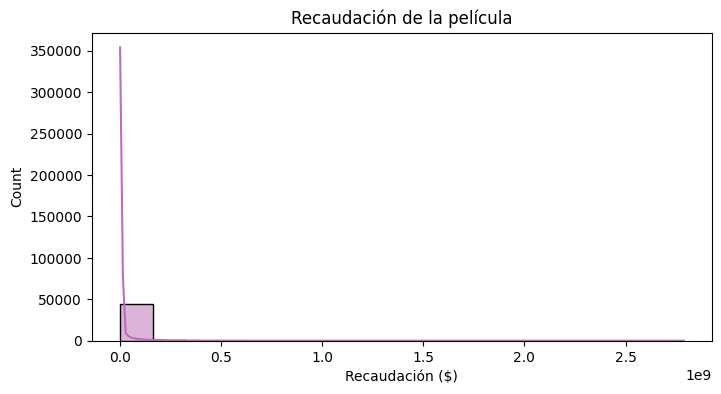

In [ ]:
# Visualizar la distribucion de los datos
fig, ax = plt.subplots(figsize = (8,4))
sns.histplot(data = df_clean, x = 'revenue', kde = True, color = '#BE6DB7')
plt.title("Recaudación de la película", fontsize = 12)
plt.xlabel("Recaudación ($)", fontsize = 10)
plt.ylabel("Count", fontsize = 10)
plt.show()

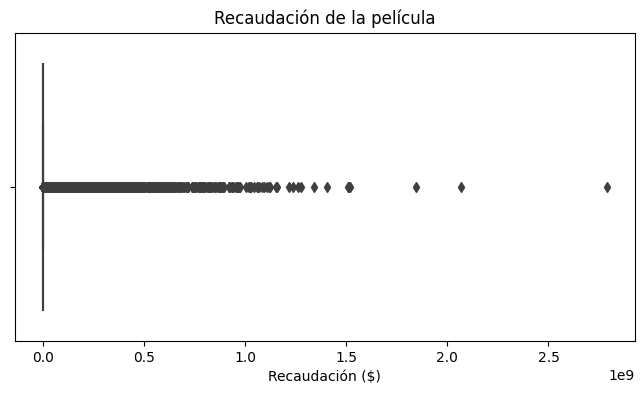

In [ ]:
# Identificar outliers con boxplot
fig, ax = plt.subplots(figsize = (8, 4))
sns.boxplot(x = df_clean.revenue)
plt.title("Recaudación de la película", fontsize = 12)
plt.xlabel("Recaudación ($)", fontsize = 10)
plt.show()

**Conclusión:**

La columna ```revenue``` parece tener una gran cantidad de valores nulos (75% de los datos), lo cual puede afectar la utilidad de esta columna para un sistema de recomendación.

En general, la columna "revenue" puede ser útil para identificar películas que han generado mayores ingresos en taquilla, lo cual puede ser un indicador de éxito comercial. Sin embargo, para un sistema de recomendación, es posible que se necesiten otras características complementarias, como el género, el director, el reparto, las calificaciones de los usuarios y las sinopsis de la película, para generar recomendaciones más precisas y personalizadas.

#### Atributo ```runtime```

Duración de la película, en minutos.

In [ ]:
# Establecer el formato de visualización de los datos de punto flotante
pd.set_option('display.float_format', '{:.2f}'.format)
# Mostrar un resumen estadístico de la columna "revenue" con el formato establecido
df_clean.runtime.describe()

count   45327.00
mean       96.68
std        35.31
min         0.00
25%        86.00
50%        95.00
75%       107.00
max      1256.00
Name: runtime, dtype: float64

In [ ]:
# Mostrar un conteo de los tiempos de duración que más se repiten en el atributo "runtime"
df_clean.runtime.value_counts().head()

90.00     2654
100.00    1522
95.00     1459
93.00     1262
96.00     1136
Name: runtime, dtype: int64

In [ ]:
# Títulos con tiempo de duración iguales a 0 minutos
df_clean[df_clean['runtime'] == 0][['runtime', 'title', 'status']]

,runtime,title,status
634,0.00,Peanuts – Die Bank zahlt alles,Released
635,0.00,Happy Weekend,Released
685,0.00,To Cross the Rubicon,Released
800,0.00,Diebinnen,Released
1270,0.00,Kids of Survival,Released
...,...,...,...
45107,0.00,Adios amigos,Released
45110,0.00,A Genius Leaves the Hood - The Unauthorized St...,Released
45130,0.00,Villa Henriette,Released
45177,0.00,Les fourmis rouges,Released


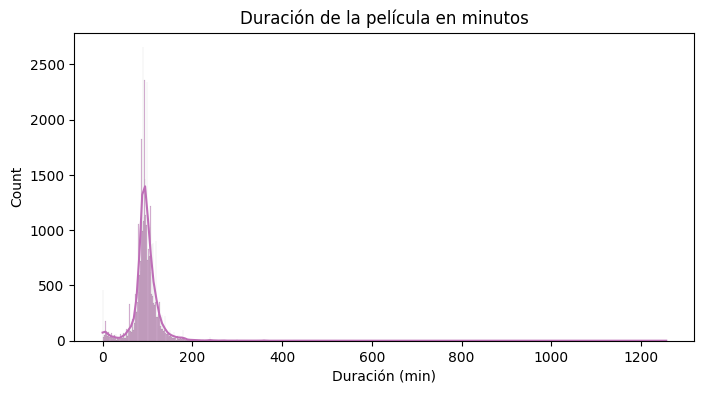

In [ ]:
# Visualizar la distribucion de los datos
fig, ax = plt.subplots(figsize = (8,4))
sns.histplot(data = df_clean, x = 'runtime', kde = True, color = '#BE6DB7')
plt.title("Duración de la película en minutos", fontsize = 12)
plt.xlabel("Duración (min)", fontsize = 10)
plt.ylabel("Count", fontsize = 10)
plt.show()

In [ ]:
# Títulos con tiempo de duración superiores a los 200 minutos
df_clean[df_clean['runtime'] > 200][['runtime', 'title', 'vote_average']]

,runtime,title,vote_average
891,238.00,Gone with the Wind,7.70
919,201.00,Giant,7.50
1160,216.00,Lawrence of Arabia,7.80
1182,229.00,Once Upon a Time in America,8.30
1240,212.00,Ben-Hur,7.50
...,...,...,...
44850,210.00,5ive Days to Midnight,6.80
44882,240.00,Jesus,5.40
44947,206.00,The Adventures of Prince Florisel,6.50
45305,270.00,The Prisoner of If Castle,5.00


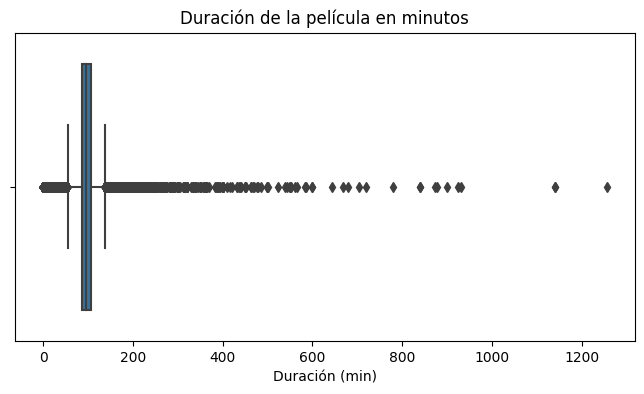

In [ ]:
# Identificar outliers con boxplot
fig, ax = plt.subplots(figsize = (8, 4))
sns.boxplot(x = df_clean.runtime)
plt.title("Duración de la película en minutos", fontsize = 12)
plt.xlabel("Duración (min)", fontsize = 10)
plt.show()

In [ ]:
# Aplicando un filtrado intercuartílico
Q1 = df_clean['runtime'].quantile(0.25)
Q3 = df_clean['runtime'].quantile(0.75)
IQR = Q3 - Q1
LR = Q1 -(1.5 * IQR)
UR = Q3 + (1.5 * IQR)

value_below = df_clean[df_clean['runtime'] < LR].shape[0]
value_above = df_clean[df_clean['runtime'] > UR].shape[0]
print(f'LR: {round(LR, 1)}\nUR : {UR}')
print(f'Cantidad de valores por debajo de LR: {value_below}\nCantidad de valores por encima de UR: {value_above}')

LR: 54.5
UR : 138.5
Cantidad de valores por debajo de LR: 2471
Cantidad de valores por encima de UR: 2244


**Conclusión:**

La columna ```runtime``` parece tener una distribución razonablemente normal y sin tantos valores extremadamente atípicos, lo que puede hacer que esta columna sea más útil para un sistema de recomendación que las columnas ```popularity``` y ```revenue```.

La media (96.82) y la mediana (95.00) son similares, lo que indica una distribución relativamente simétrica. Además, el rango intercuartil (IQR) es razonablemente estrecho (21), lo que sugiere que la mayoría de las películas tienen una duración similar.

En general, la columna ```runtime``` puede ser útil para identificar películas con una duración similar, lo que puede ser importante para los usuarios que prefieren películas más cortas o más largas. Sin embargo, para un sistema de recomendación, es posible que se necesiten otras características complementarias, como el género, el director, el reparto, las calificaciones de los usuarios y las sinopsis de la película, para generar recomendaciones más precisas y personalizadas.

#### Atributo ```vote_average```

Puntaje promedio de reseñas de la película

In [ ]:
# Establecer el formato de visualización de los datos de punto flotante
pd.set_option('display.float_format', '{:.2f}'.format)
# Mostrar un resumen estadístico de la columna "revenue" con el formato establecido
df_clean.vote_average.describe()

count   45346.00
mean        5.62
std         1.92
min         0.00
25%         5.00
50%         6.00
75%         6.80
max        10.00
Name: vote_average, dtype: float64

In [ ]:
# Mostrar un conteo de los puntajes promedios que más se repiten en el atributo "vote_average"
df_clean.vote_average.value_counts().head()

0.00    2944
6.00    2461
5.00    1994
7.00    1882
6.50    1722
Name: vote_average, dtype: int64

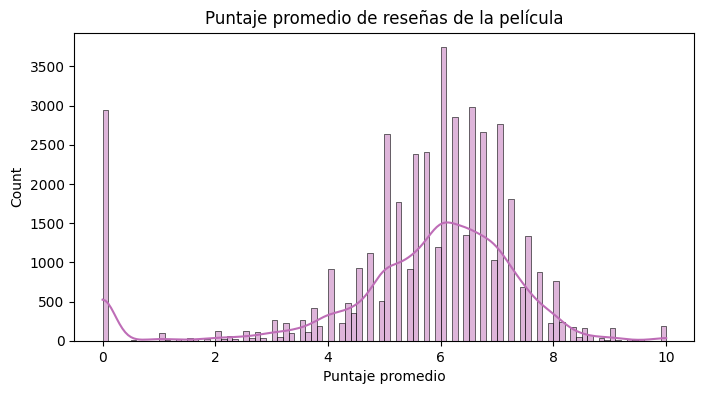

In [ ]:
# Visualizar la distribucion de los datos
fig, ax = plt.subplots(figsize = (8,4))
sns.histplot(data = df_clean, x = 'vote_average', kde = True, color = '#BE6DB7')
plt.title("Puntaje promedio de reseñas de la película", fontsize = 12)
plt.xlabel("Puntaje promedio", fontsize = 10)
plt.ylabel("Count", fontsize = 10)
plt.show()

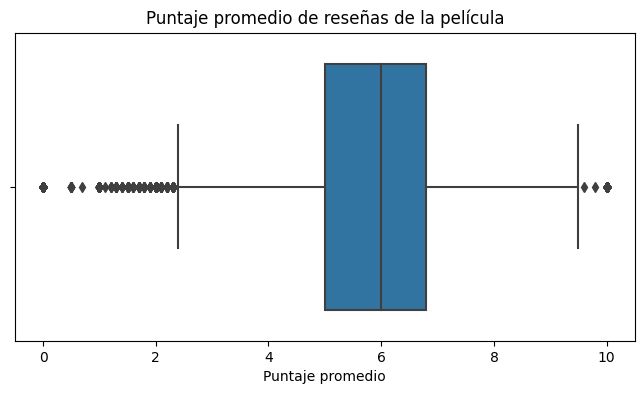

In [ ]:
# Identificar outliers con boxplot
fig, ax = plt.subplots(figsize = (8, 4))
sns.boxplot(x = df_clean.vote_average)
plt.title("Puntaje promedio de reseñas de la película", fontsize = 12)
plt.xlabel("Puntaje promedio", fontsize = 10)
plt.show()

In [ ]:
# Aplicando un filtrado intercuartílico
Q1 = df_clean['vote_average'].quantile(0.25)
Q3 = df_clean['vote_average'].quantile(0.75)
IQR = Q3 - Q1
LR = Q1 -(1.5 * IQR)
UR = Q3 + (1.5 * IQR)

value_below = df_clean[df_clean['vote_average'] < LR].shape[0]
value_above = df_clean[df_clean['vote_average'] > UR].shape[0]
print(f'LR: {round(LR, 1)}\nUR : {UR}')
print(f'Cantidad de valores por debajo de LR: {value_below}\nCantidad de valores por encima de UR: {value_above}')

LR: 2.3
UR : 9.5
Cantidad de valores por debajo de LR: 3353
Cantidad de valores por encima de UR: 187


In [ ]:
df_clean[df_clean['vote_average'] < LR].vote_average.value_counts().head(1)

0.00    2944
Name: vote_average, dtype: int64

In [ ]:
df_clean[df_clean['vote_average'] > UR].vote_average.value_counts().head()

10.00    185
9.60       1
9.80       1
Name: vote_average, dtype: int64

**Conclusión:**

La columna "vote_average" parece tener una distribución razonablemente normal y sin valores extremadamente atípicos, lo que puede hacer que esta columna sea útil para un sistema de recomendación.

La media (5.62) y la mediana (6.00) son similares, lo que indica una distribución relativamente simétrica. Además, el rango intercuartil (IQR) es razonablemente estrecho (1.8), lo que sugiere que la mayoría de las películas tienen una calificación similar.

En general, la columna "vote_average" puede ser útil para identificar películas con una calificación similar, lo que puede ser importante para los usuarios que prefieren películas con cierto nivel de calidad. Sin embargo, para un sistema de recomendación, es posible que se necesiten otras características complementarias, como el género, el director, el reparto, las calificaciones de los usuarios y las sinopsis de la película, para generar recomendaciones más precisas y personalizadas.

#### Atributo ```vote_count```

Número de votos recibidos por la película, en TMDB

In [ ]:
# Establecer el formato de visualización de los datos de punto flotante
pd.set_option('display.float_format', '{:.2f}'.format)
# Mostrar un resumen estadístico de la columna "vote_count" con el formato establecido
df_clean.vote_count.describe()

count   45346.00
mean      110.14
std       491.90
min         0.00
25%         3.00
50%        10.00
75%        34.00
max     14075.00
Name: vote_count, dtype: float64

In [ ]:
# Mostrar un conteo del número de votos que más se repiten en el atributo "vote_count"
df_clean.vote_count.value_counts().head()

1.00    3240
2.00    3127
0.00    2846
3.00    2780
4.00    2477
Name: vote_count, dtype: int64

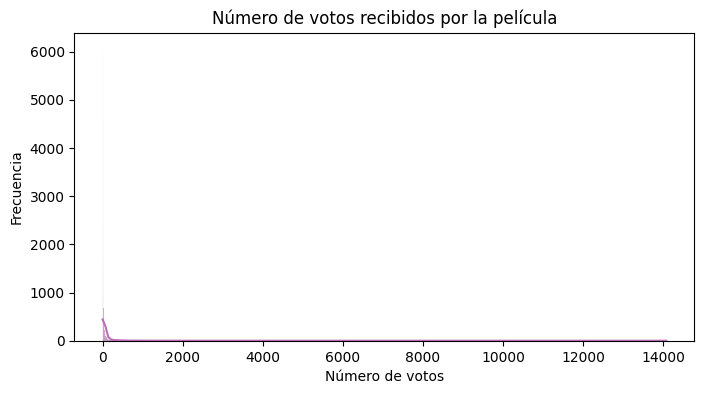

In [ ]:
# Visualizar la distribucion de los datos
fig, ax = plt.subplots(figsize = (8,4))
sns.histplot(data = df_clean, x = 'vote_count', kde = True, color = '#BE6DB7')
plt.title("Número de votos recibidos por la película", fontsize = 12)
plt.xlabel("Número de votos", fontsize = 10)
plt.ylabel("Frecuencia", fontsize = 10)
plt.show()

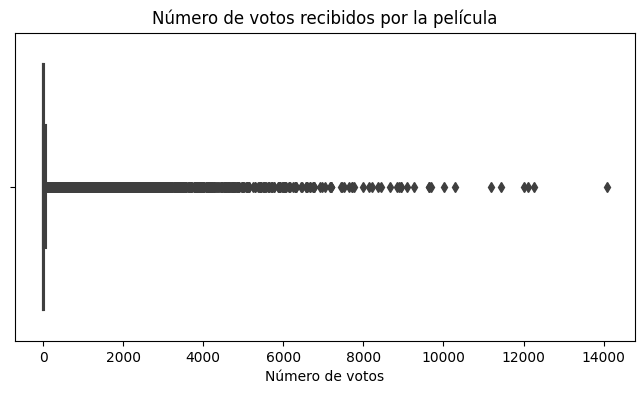

In [ ]:
# Identificar outliers con boxplot
fig, ax = plt.subplots(figsize = (8, 4))
sns.boxplot(x = df_clean.vote_count)
plt.title("Número de votos recibidos por la película", fontsize = 12)
plt.xlabel("Número de votos", fontsize = 10)
plt.show()

In [ ]:
# Aplicando el filtrado intercuartílico
Q1 = df_clean['vote_count'].quantile(0.25)
Q3 = df_clean['vote_count'].quantile(0.75)
IQR = Q3 - Q1
LR = Q1 -(1.5 * IQR)
UR = Q3 + (1.5 * IQR)

value_below = df_clean[df_clean['vote_count'] < LR].shape[0]
value_above = df_clean[df_clean['vote_count'] > UR].shape[0]
print(f'LR: {round(LR, 1)}\nUR : {UR}')
print(f'Cantidad de valores por debajo de LR: {value_below}\nCantidad de valores por encima de UR: {value_above}')

LR: -43.5
UR : 80.5
Cantidad de valores por debajo de LR: 0
Cantidad de valores por encima de UR: 6881


In [ ]:
# Mostrar un conteo del número de votos que más se repiten por debajo de UR en el atributo "vote_count"
df_clean[df_clean['vote_count'] < UR].vote_count.value_counts().head()

1.00    3240
2.00    3127
0.00    2846
3.00    2780
4.00    2477
Name: vote_count, dtype: int64

In [ ]:
# Cantidad de películas con más de cien votos
df_clean[df_clean['vote_count'] >= 100].shape[0]

6050

In [ ]:
# Cantidad de películas con más de cincuenta votos
df_clean[df_clean['vote_count'] >= 50].shape[0]

9141

**Conlusión:**

La columna ```vote_count``` parece tener una gran cantidad de valores extremadamente bajos y una distribución muy sesgada hacia valores más bajos, lo cual puede afectar la utilidad de esta columna para un sistema de recomendación.

En particular, la mayoría de las películas (25% de los datos) tienen solo 3 votos o menos, lo que puede hacer que las películas menos conocidas o menos populares sean menos representativas en la columna ```vote_count```.

### Variables categóricas

Algunas variables categóricas relevantes en el conjunto de datos son: ```genres```, ```title```, ```overview```, ```tagline```, ```production_companies```

#### Atributo ```genres```

Todos los géneros asociados a las películas

In [ ]:
# Verificar la cantidad de valores faltantes para la columna "genres"
df_clean.genres.isnull().sum()

446

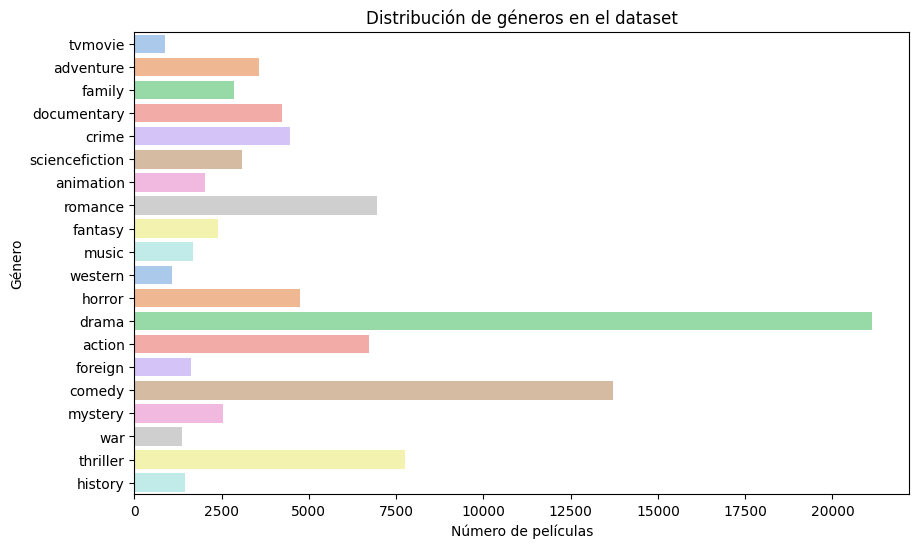

In [ ]:
# Eliminar filas con valores faltantes en la columna "genres"
df_mod_clean = df_clean.dropna(subset=['genres'])

# Crear una lista de todos los géneros presentes en el dataset
all_genres = []

for genres in df_mod_clean['genres']:
    genres_list = genres.split(',')
    all_genres.extend(genres_list)

unique_genres = set(all_genres)

# Contar cuántas películas hay en cada género
genre_counts = {}

for genre in unique_genres:
    count = 0
    for genres in df_mod_clean['genres']:
        if genre in genres:
            count += 1
    genre_counts[genre] = count

genre_counts = pd.Series(genre_counts)

# Calcular la frecuencia relativa de cada género
genre_freqs = genre_counts / len(df_mod_clean)

# Crear una paleta de colores pasteles personalizada
colors = sns.color_palette('pastel', n_colors=len(genre_counts))

# Graficar un gráfico de barras para mostrar la distribución de géneros
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette=colors)
plt.xlabel('Número de películas')
plt.ylabel('Género')
plt.title('Distribución de géneros en el dataset')
plt.show()

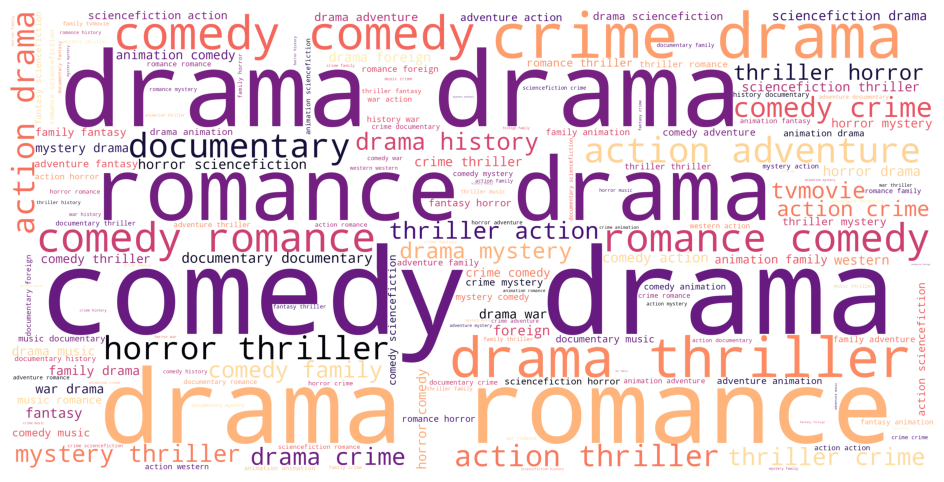

In [ ]:
# Eliminar filas con valores faltantes en la columna "genres"
df_mod_clean = df_clean.dropna(subset=['genres'])

# Crear una lista de todas las palabras en la columna "genres"
all_genres = []
for genres in df_mod_clean['genres']:
    genres_list = genres.split(',')
    all_genres.extend(genres_list)

# Convertir la lista de palabras en un string
genres_string = ' '.join(all_genres)

title_wordcloud = WordCloud(background_color = 'white', height = 2000, width = 4000, colormap = 'magma').generate(genres_string)
plt.figure(figsize = (12,6))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

A continuación veremos una lista de los géneros más populares de los títulos presentes en el Dataframe 'df_clean'

In [ ]:
# Crear un DataFrame de indicadores de género utilizando el método str.get_dummies()
genres_df = df_clean['genres'].str.get_dummies(sep = ',')
# Sumar las columnas de "genres_df" de géneros para obtener la cantidad total de películas en cada género
genre_count = genres_df.sum().sort_values(ascending=False)
# Convertir la cantidad de películas en cada género en porcentajes del total
genre_percentages = genre_count / len(df_clean) * 100
# Imprimir la lista de géneros con sus porcentajes
print('Lista de los 10 géneros más populares:')
for genre, percentage in genre_percentages.head(10).items():
  print(f"- {genre}: {percentage:.2f}%")

Lista de los 10 géneros más populares:
- drama: 46.64%
- comedy: 30.25%
- thriller: 17.10%
- romance: 15.33%
- action: 14.85%
- horror: 10.49%
- crime: 9.81%
- documentary: 9.30%
- adventure: 7.87%
- sciencefiction: 6.82%


**Conclusión:**

La columna "genres" contiene información sobre los géneros de cada película, lo que permite a un sistema de recomendación identificar películas similares en función de los géneros compartidos. Esto puede ser particularmente útil para los usuarios que tienen preferencias de género específicas y buscan películas dentro de esos géneros.

Además, la columna "genres" puede ser utilizada para crear características adicionales, como la frecuencia de género, que pueden mejorar la precisión y personalización de las recomendaciones.

#### Atributo ```title```

Título de las películas

##### Longitud de los resúmenes de las películas

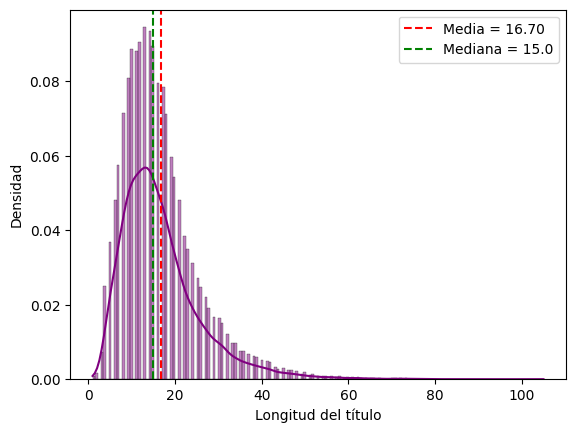

In [ ]:
# Calcular la longitud de los títulos de las películas
title_lengths = df_clean['title'].apply(len)

# Calcular la media, mediana y desviación estándar de la longitud de los títulos
mean_length = title_lengths.mean()
median_length = title_lengths.median()
std_length = title_lengths.std()

# Graficar un histograma y una distribución de densidad para mostrar la distribución de la longitud de los títulos
sns.histplot(title_lengths, kde=True, stat='density', color='purple')
plt.axvline(mean_length, color='red', linestyle='dashed', linewidth=1.5, label=f'Media = {mean_length:.2f}')
plt.axvline(median_length, color='green', linestyle='dashed', linewidth=1.5, label=f'Mediana = {median_length}')
plt.legend()
plt.xlabel('Longitud del título')
plt.ylabel('Densidad')
plt.show()

##### Wordcloud

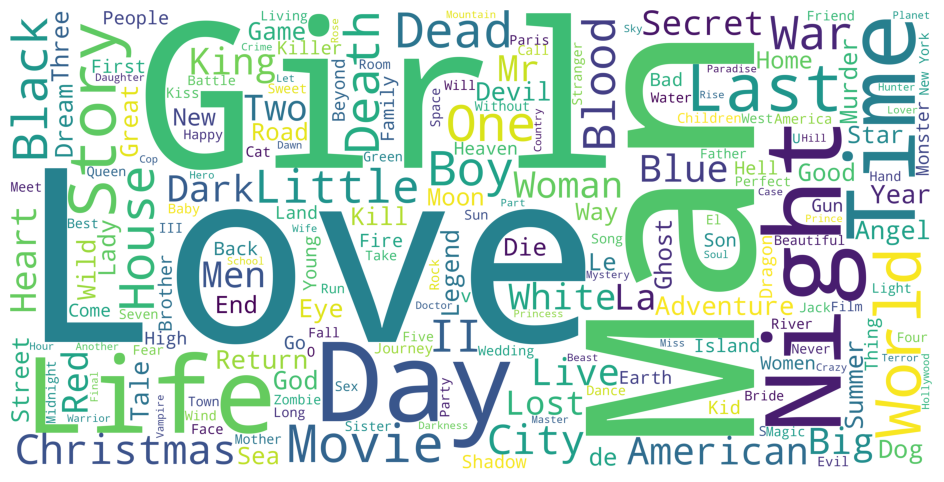

In [ ]:
title_esp = ' '.join(df_clean['title'])
title_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 2000, width = 4000).generate(title_esp)
plt.figure(figsize = (12,6))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

**Conclusión:**

La media (16.70) y la mediana (15.00) de la longitud de los títulos indican que la mayoría de los títulos de las películas en el dataset son relativamente cortos.

En general, la longitud de los títulos puede ser una característica útil para un sistema de recomendación de películas, ya que los títulos pueden proporcionar información sobre el género, la trama y el tono de la película. Sin embargo, es importante tener en cuenta que la longitud del título por sí sola no es suficiente para determinar la calidad o la relevancia de la película para el usuario, y se deben utilizar otras características complementarias para generar recomendaciones más precisas y personalizadas.

#### Atributos ```overview_clean``` y  ```overview```

Resumen de las películas.

##### Longitud de los resúmenes de las películas

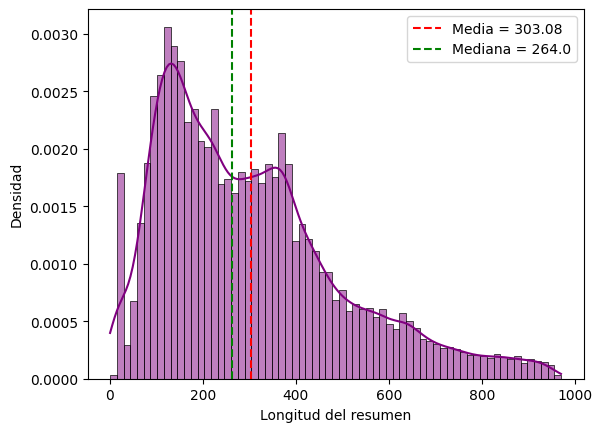

In [ ]:
# Calcular la longitud de los resúmenes
overview_length = df_clean['overview_clean'].apply(len)

# Graficar un histograma y una distribución de densidad para mostrar la distribución de la longitud de los resúmenes
sns.histplot(overview_length, kde=True, stat='density', color='purple')
plt.axvline(overview_length.mean(), color='red', linestyle='dashed', linewidth=1.5, label=f'Media = {overview_length.mean():.2f}')
plt.axvline(overview_length.median(), color='green', linestyle='dashed', linewidth=1.5, label=f'Mediana = {overview_length.median()}')
plt.legend()
plt.xlabel('Longitud del resumen')
plt.ylabel('Densidad')
plt.show()

la distribución de la longitud de los resúmenes es asimétrica y sesgada hacia la derecha, lo que significa que hay algunos valores atípicos en el extremo derecho de la distribución que están aumentando la media.

El hecho de que haya dos picos en la distribución podría indicar que hay dos grupos diferentes de resúmenes en los datos, con diferentes longitudes. Sería interesante investigar si hay alguna relación entre los resúmenes más largos y la calidad de las películas.

##### Wordcloud

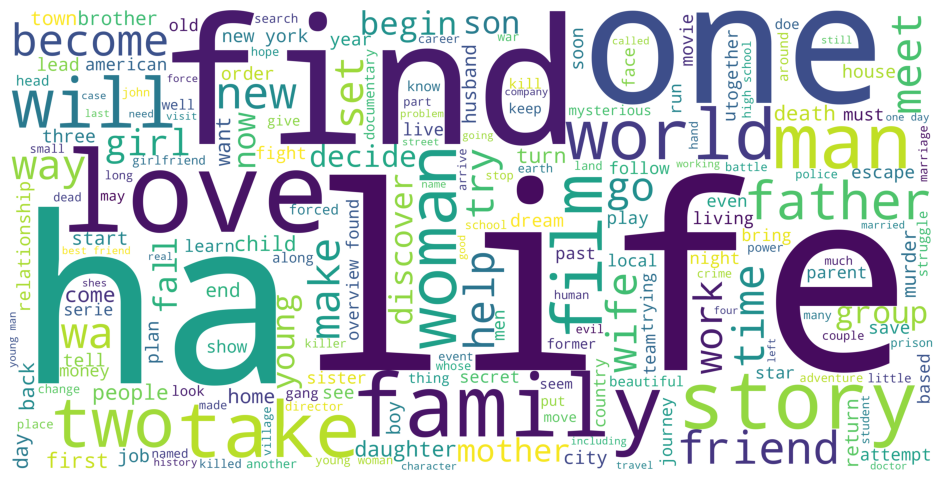

In [ ]:
# Eliminar filas con valores faltantes en la columna "overview"
df_overview = df_clean.dropna(subset=['overview_clean'])

overview_esp = ' '.join(df_overview['overview_clean'])
overview_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 2000, width = 4000).generate(overview_esp)
plt.figure(figsize = (12,6))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

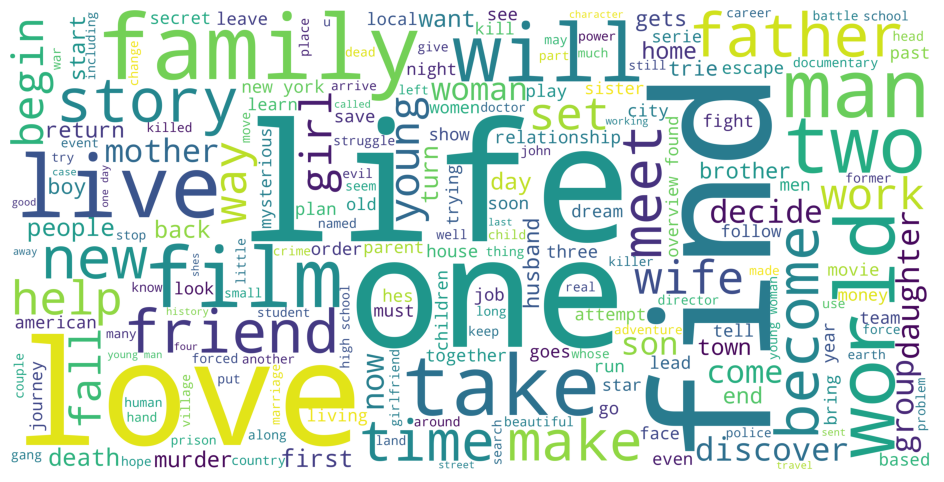

In [ ]:
# Eliminar filas con valores faltantes en la columna "overview"
df_overview = df_clean.dropna(subset=['overview'])

overview_esp = ' '.join(df_overview['overview'])
overview_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 2000, width = 4000).generate(overview_esp)
plt.figure(figsize = (12,6))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

**Conclusión:**

La columna ```overview``` puede ser muy útil para un sistema de recomendación de películas, ya que proporciona una breve descripción o resumen de la trama y la historia de cada película. Los resúmenes pueden ser una característica importante, ya que los usuarios suelen recurrir a estos para evaluar si están interesados en ver una película o no.

La columna ```overview``` puede ser utilizada para extraer características adicionales, como las palabras clave o los temas principales de la trama, que pueden ser útiles para identificar películas similares en función de los temas compartidos.

#### Atributo ```production_companies```

Compañías productoras asociadas a las películas

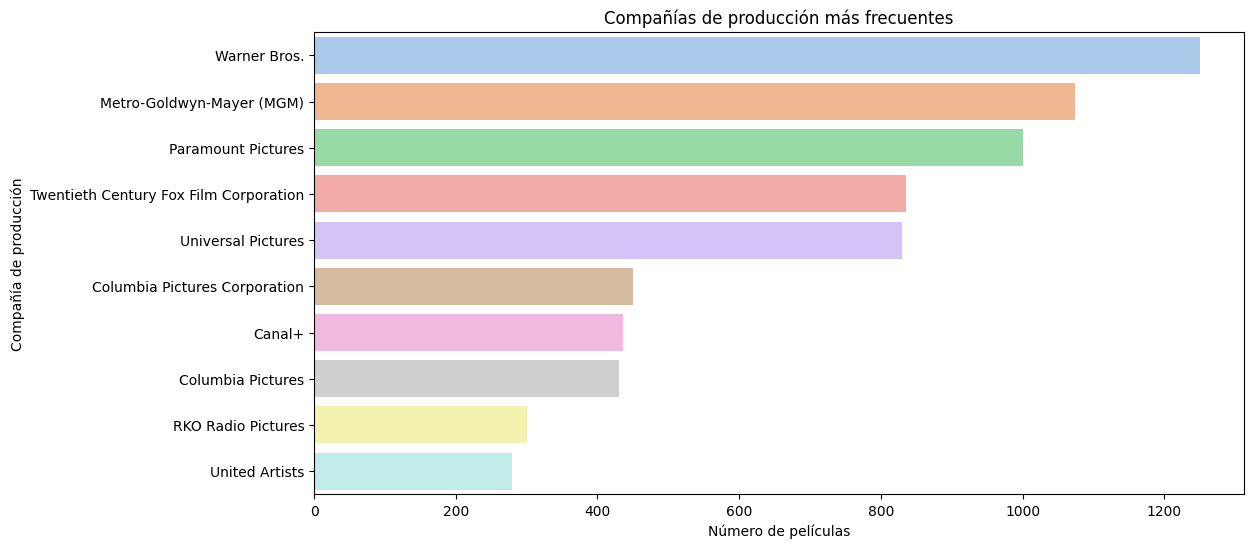

In [ ]:
# Eliminar las filas con valores nulos en la columna 'production_companies'
df = df_clean.dropna(subset=['production_companies'])

# Dividir las compañías de producción en una lista de strings
company_list = df['production_companies'].str.split(',').explode().str.strip()

# Contar la frecuencia de cada compañía de producción
company_counts = company_list.value_counts()

# Identificar las compañías de producción más frecuentes
top_companies = company_counts.head(10)

# Definir la paleta de colores
colors = sns.color_palette('pastel', n_colors=len(top_companies))

# Crear el gráfico de barras utilizando Seaborn
plt.figure(figsize=(12,6))
sns.barplot(x=top_companies.values, y=top_companies.index, orient='h', palette=colors)
plt.xlabel('Número de películas')
plt.ylabel('Compañía de producción')
plt.title('Compañías de producción más frecuentes')
plt.show()

**Conclusión:**

La columna "production_companies" no es necesariamente la más útil para un sistema de recomendación de películas, ya que proporciona información sobre las compañías de producción que estuvieron involucradas en la realización de una película, pero no necesariamente indica el contenido o el género de la película en sí.

Sin embargo, la información sobre las compañías de producción puede ser útil en ciertos casos, por ejemplo, si se desea recomendar películas producidas por una compañía específica o si se desea proporcionar información adicional sobre una película recomendada a un usuario.

#### Atributo ```tagline```

Eslogan asociado a las películas

In [ ]:
# Verificar la cantidad de valores faltantes para la columna "tagline"
df_clean.tagline.isnull().sum()

24963

##### Longitud de los eslogan publicitarios de las películas

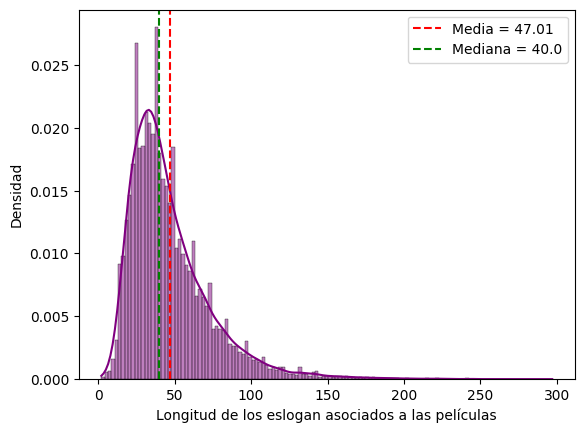

In [ ]:
# Eliminar filas con valores faltantes en la columna "tagline"
df_mod_clean = df_clean.dropna(subset=['tagline'])

# Calcular la longitud de los eslogan de las películas
tagline_lengths = df_mod_clean['tagline'].apply(len)

# Calcular la media, mediana y desviación estándar de la longitud de los eslogan de las películas
mean_length = tagline_lengths.mean()
median_length = tagline_lengths.median()
std_length = tagline_lengths.std()

# Graficar un histograma y una distribución de densidad para mostrar la distribución de la longitud de los eslogan de las películas
sns.histplot(tagline_lengths, kde=True, stat='density', color='purple')
plt.axvline(mean_length, color='red', linestyle='dashed', linewidth=1.5, label=f'Media = {mean_length:.2f}')
plt.axvline(median_length, color='green', linestyle='dashed', linewidth=1.5, label=f'Mediana = {median_length}')
plt.legend()
plt.xlabel('Longitud de los eslogan asociados a las películas')
plt.ylabel('Densidad')
plt.show()

##### WordCloud

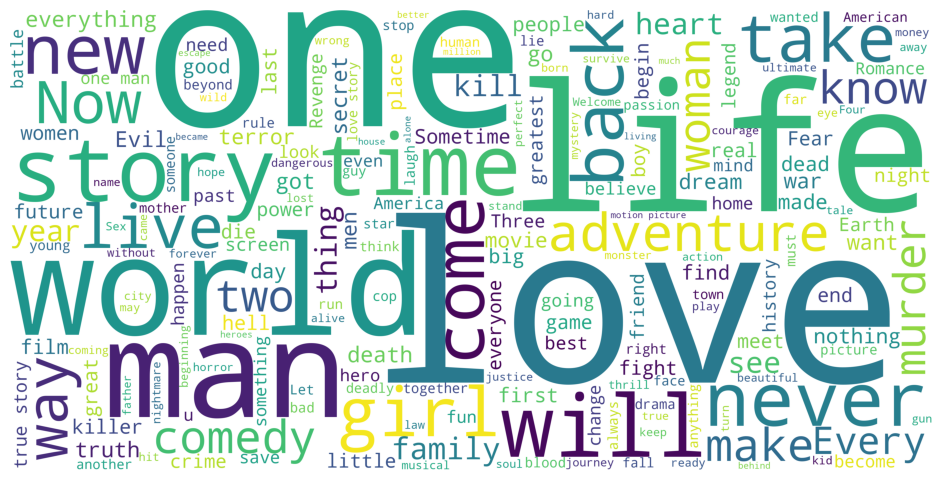

In [ ]:
# Eliminar filas con valores faltantes en la columna "tagline"
df_mod_clean = df_clean.dropna(subset=['tagline'])

tagline_esp = ' '.join(df_mod_clean['tagline'])
tagline_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 2000, width = 4000).generate(tagline_esp)
plt.figure(figsize = (12,6))
plt.imshow(tagline_wordcloud)
plt.axis('off')
plt.show()

**Conclusión:**

En general, la longitud de los lemas o eslogan publicitarios es un factor importante en la publicidad de las películas, ya que puede influir en la percepción de los espectadores y en su interés por ver la película. Por lo tanto, comprender cómo se distribuyen las longitudes de los lemas o eslogan publicitarios podría ser útil para los equipos de marketing y publicidad de las películas.

## **Análisis Bivariable**

Se examinará cómo cambia una variable en relación a otra

### ```budget``` vs ```revenue```

Analizar la relación entre el presupuesto y la recaudacion de las peliculas

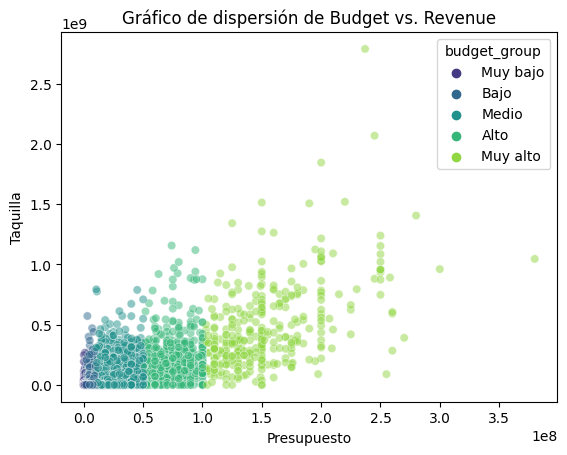

In [ ]:
# visualizar si hay una relación entre el presupuesto de una película y su taquilla
bins = [0, 1000000, 10000000, 50000000, 100000000, 400000000]
labels = ['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto']
df_clean['budget_group'] = pd.cut(df_clean['budget'], bins=bins, labels=labels)
sns.scatterplot(data=df_clean, x='budget', y='revenue', hue='budget_group', palette='viridis', alpha=0.5)
plt.xlabel('Presupuesto')
plt.ylabel('Taquilla')
plt.title('Gráfico de dispersión de Budget vs. Revenue')
plt.show()

De la relación entre "revenue" y "budget", se va identificar que géneros de películas tienden a tener un mayor retorno de inversión en comparación con sus presupuestos.

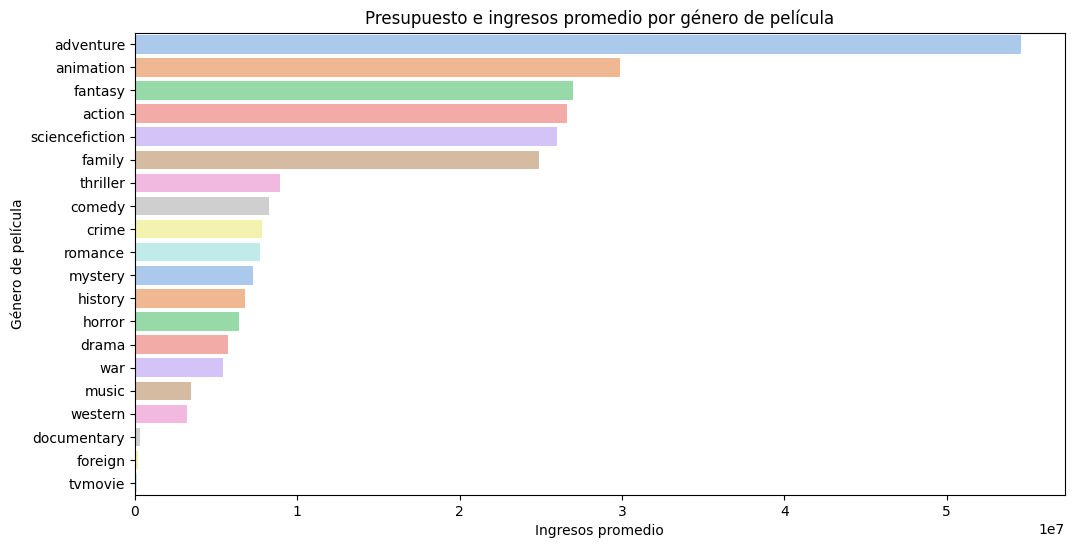

In [ ]:
# Seleccionar las columnas de interés
df = df_clean[['genres', 'budget', 'revenue']].copy()
# Eliminar las filas que contienen valores nulos en la columna "genres"
df = df.dropna(subset=['genres'])

# Separar los géneros en columnas individuales
df_genres = df['genres'].str.split(',', expand=True)
# Concatenar las columnas de género con las columnas de presupuesto e ingresos
df_genres = pd.concat([df[['budget', 'revenue']], df_genres], axis=1)

# Convertir las columnas "budget" y "revenue" a tipo numérico
df_genres[['budget', 'revenue']] = df_genres[['budget', 'revenue']].astype(int)
# Calcular el presupuesto e ingresos promedio por género de película
df_agg = df_genres.groupby([0])[['budget', 'revenue']].mean().reset_index()
# Ordenar los datos por ingresos promedio
df_agg = df_agg.sort_values(by='revenue', ascending=False)

# Crear el gráfico de barras utilizando Seaborn
plt.figure(figsize=(12,6))
sns.barplot(x='revenue', y=0, data=df_agg, palette='pastel', order=df_agg[0])
plt.xlabel('Ingresos promedio')
plt.ylabel('Género de película')
plt.title('Presupuesto e ingresos promedio por género de película')
plt.show()

**Conclusión:**

Conocer el ingreso promedio por género de cada película podría ser útil para un sistema de recomendación.

Un sistema de recomendación generalmente utiliza datos históricos para hacer recomendaciones personalizadas a los usuarios. Si el sistema tiene acceso a información detallada sobre los ingresos por género de las películas, podría utilizar esa información para recomendar películas a los usuarios que tengan un historial de consumo de películas similares en términos de género y nivel de ingresos.

### ```vote_average``` vs ```genres```

Analizar la relación entre los géneros y el voto promedio.

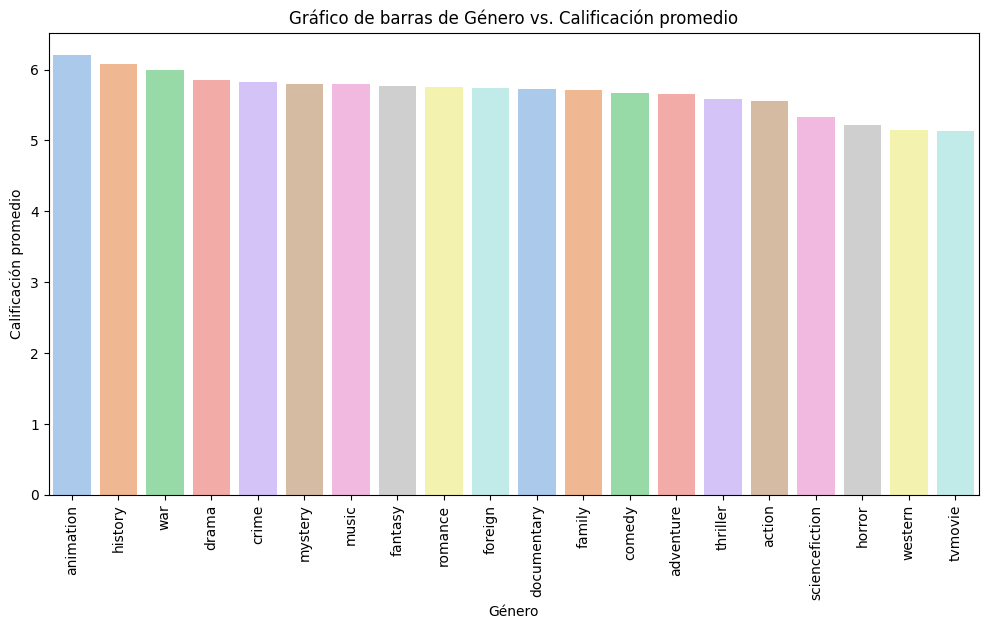

In [ ]:
# Seleccionar las columnas de interés
df = df_clean[['genres', 'vote_average']].copy()
# Eliminar las filas que contienen valores nulos
df = df.dropna()

# Separar los géneros y contar la calificación promedio por género
genres_vote = df['genres'].str.split(',').explode().to_frame()
genres_vote['vote_average'] = df['vote_average']
vote_by_genre = genres_vote.groupby('genres')['vote_average'].mean().sort_values(ascending=False)

# Crear la paleta de colores pastel de Seaborn
colors = sns.color_palette('pastel', len(vote_by_genre))

# Graficar utilizando Seaborn
plt.figure(figsize=(12,6))
sns.barplot(x=vote_by_genre.index, y=vote_by_genre.values, palette=colors)
plt.xticks(rotation = 90)
plt.xlabel('Género')
plt.ylabel('Calificación promedio')
plt.title('Gráfico de barras de Género vs. Calificación promedio')
plt.show()

Este gráfico indica que la mayoría de los géneros en df_clean tienen una calificación promedio similar y alta. Esto puede significar que los usuarios de df_clean tienden a calificar las películas en general con una puntuación alta, o que df_clean en sí misma contiene películas que son en su mayoría bien calificadas.

### ```popularity``` vs ```genres```

Relación entre los géneros y la popullaridad

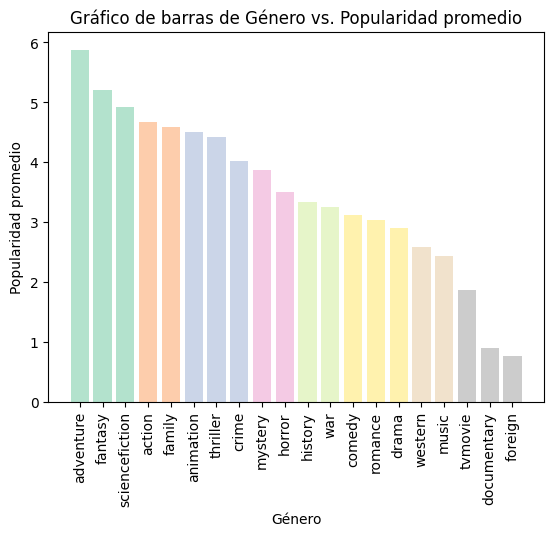

In [ ]:
# Seleccionar las columnas de interés
df = df_clean[['genres', 'popularity']].copy()
# Eliminar las filas que contienen valores nulos
df = df.dropna()

# Separar los géneros y contar la popularidad promedio por género
genres_popularity = df['genres'].str.split(',').explode().to_frame()
genres_popularity['popularity'] = df['popularity']
popularity_by_genre = genres_popularity.groupby('genres')['popularity'].mean().sort_values(ascending=False)

# Graficar
plt.bar(popularity_by_genre.index, popularity_by_genre.values, color=plt.cm.Pastel2(np.linspace(0, 1, len(popularity_by_genre))))
plt.xticks(rotation=90)
plt.xlabel('Género')
plt.ylabel('Popularidad promedio')
plt.title('Gráfico de barras de Género vs. Popularidad promedio')
plt.show()

Las películas de aventura y fantasía son las que tienen una popularidad promedio por encima de 5

### ```release_date``` vs ```title```

Cantidad de películas por mes, día y año

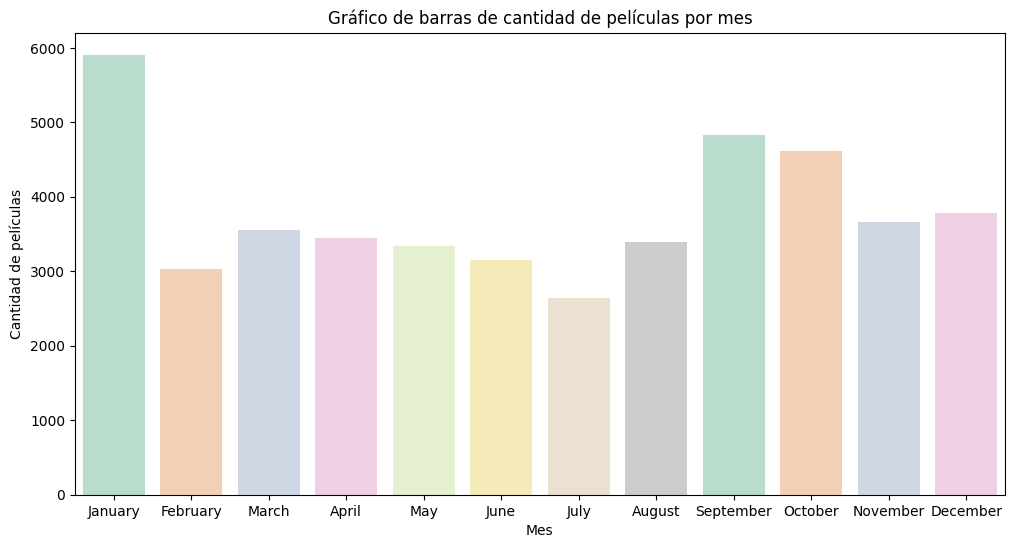

In [ ]:
# Crear un gráfico de barras de la cantidad de películas por mes
df_clean['month'] = pd.DatetimeIndex(df_clean['release_date']).month
month_counts = df_clean['month'].value_counts().sort_index()
plt.figure(figsize=(12,6))
sns.barplot(x=month_counts.index, y=month_counts.values, palette='Pastel2')
plt.xlabel('Mes')
plt.ylabel('Cantidad de películas')
plt.title('Gráfico de barras de cantidad de películas por mes')

# Cambiar el idioma de los meses a español
months_spanish = [calendar.month_name[i] for i in range(1,13)]
ax = plt.gca()
ax.set_xticklabels(months_spanish)

plt.show()

Los meses con mayor cantidad de lanzamiento de películas son Enero, Septiembre y Octubre. Mientras que Julio es el mes con menos cantidad de películas lanzadas

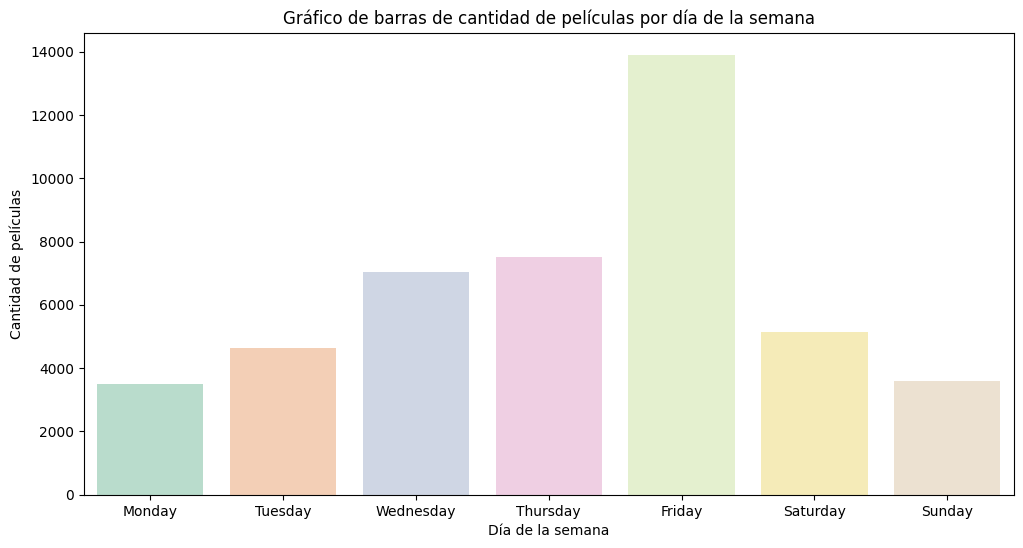

In [ ]:
# Crear un gráfico de barras de la cantidad de películas por día de la semana
df_clean['dia_semana'] = pd.DatetimeIndex(df_clean['release_date']).weekday
counts_día_semana = df_clean['dia_semana'].value_counts().sort_index()
plt.figure(figsize=(12,6))
sns.barplot(x=counts_día_semana.index, y=counts_día_semana.values, palette='Pastel2')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de películas')
plt.title('Gráfico de barras de cantidad de películas por día de la semana')

# Cambiar el idioma de los días de la semana a español
días_semana_español = [calendar.day_name[i] for i in range(7)]
ax = plt.gca()
ax.set_xticklabels(días_semana_español)

plt.show()

Estratégicamente los viernes son los días predilectos para lanzar películas.

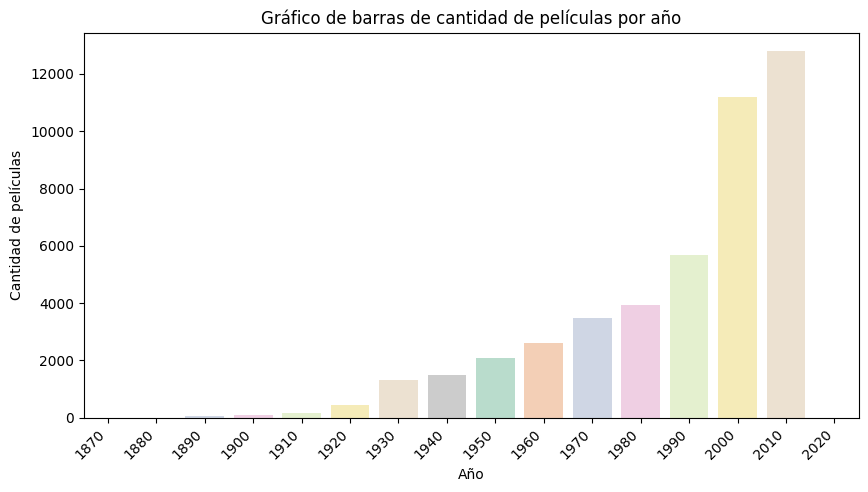

In [ ]:
# Crear un gráfico de barras de la cantidad de películas por año
df_clean['año'] = pd.DatetimeIndex(df_clean['release_date']).year
counts_año = df_clean['año'].value_counts().sort_index()

# Agrupar los años en intervalos de 10 años
counts_año_intervalo = counts_año.groupby((counts_año.index//10)*10).sum()

plt.figure(figsize=(10,5))
sns.barplot(x=counts_año_intervalo.index, y=counts_año_intervalo.values, palette='Pastel2')
plt.xlabel('Año')
plt.ylabel('Cantidad de películas')
plt.title('Gráfico de barras de cantidad de películas por año')

# Cambiar el idioma de los años a español y rotar las etiquetas
ax = plt.gca()
formatter = FuncFormatter(lambda x, pos: '{:.0f}'.format(x))
ax.xaxis.set_major_formatter(formatter)
años_spanish = [str(int(i)) for i in counts_año_intervalo.index]
ax.set_xticklabels(años_spanish, rotation=45, ha='right')

plt.show()

### ```overview``` vs ```vote_average```

Investigar la relación entre la longitud del resumen (overview) y la calidad de las películas

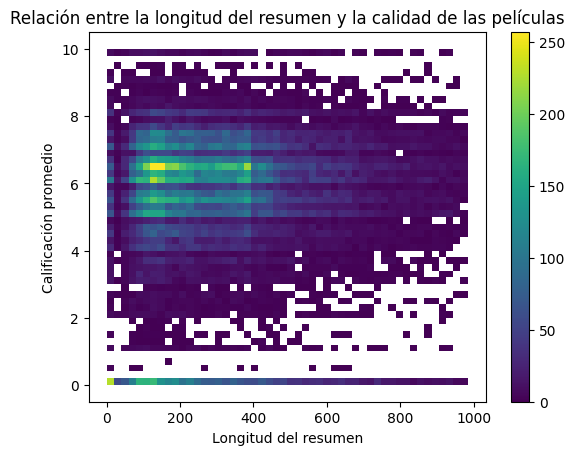

In [ ]:
# Crear un DataFrame con las columnas 'overview' y 'vote_average'
df = df_clean[['overview', 'vote_average']].copy()
# Eliminar filas con valores faltantes en la columna 'overview'
df = df.dropna(subset=['overview'])

# Calcular la longitud del resumen y agregarla como una nueva columna
df['overview_length'] = df['overview'].apply(len)

# Crear el gráfico de dispersión con heatmap
sns.histplot(data=df, x='overview_length', y='vote_average', bins=50, cmap='viridis', cbar=True)

# Agregar etiquetas y títulos al gráfico
plt.xlabel('Longitud del resumen')
plt.ylabel('Calificación promedio')
plt.title('Relación entre la longitud del resumen y la calidad de las películas')

# Mostrar el gráfico
plt.show()

El gráfico muestra que hay una densidad alta de películas con una calificación promedio alta y una longitud del resumen corta-media. Esto podría indicar que los resúmenes más cortos pueden ser más efectivos para resumir películas de alta calidad, pero se necesitaría una investigación más detallada para confirmar esta hipótesis.

### ```actors``` vs ```title```

Actores que más han aparecido en películas

In [ ]:
# Crear un DataFrame con las columnas 'actors' y 'title'
df = df_clean[['actors', 'title']].copy()
# Eliminar filas con valores faltantes en la columna 'actors'
df = df.dropna(subset=['actors'])

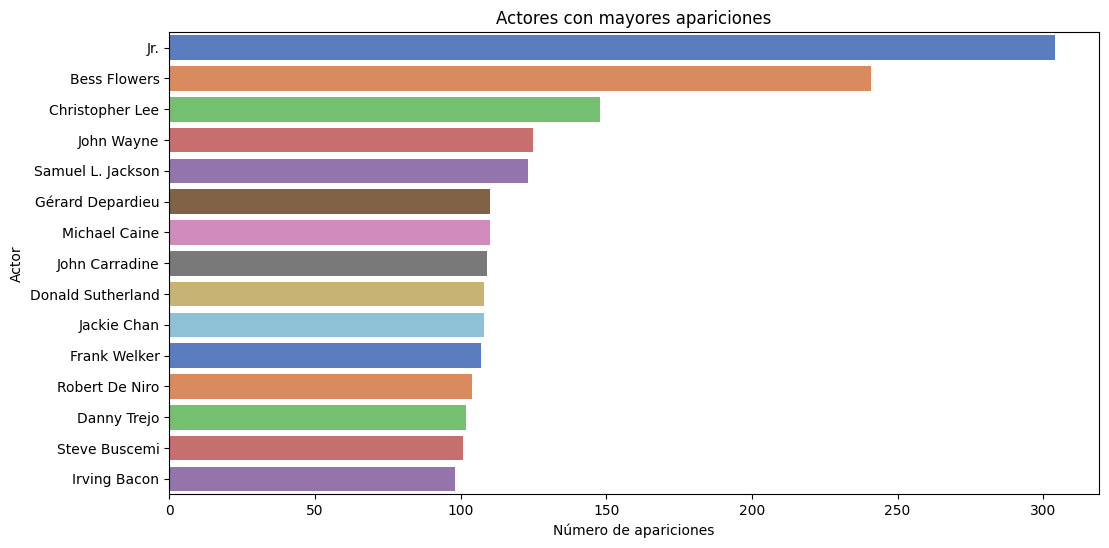

In [ ]:
# Crear un DataFrame con una fila para cada actor
actors_df = df['actors'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).to_frame('actor')
actors_df['actor'] = actors_df['actor'].str.strip()

# Contar el número de apariciones de cada actor y seleccionar los 15 actores con más apariciones
top_actors = actors_df['actor'].value_counts()[:15]

# Graficar los actores con más apariciones
plt.subplots(figsize=(12,6))
ax = sns.barplot(y=top_actors.index, x=top_actors.values, palette='muted')
ax.set_title('Actores con mayores apariciones')
ax.set_xlabel('Número de apariciones')
ax.set_ylabel('Actor')
plt.show()

### ```directs``` vs ```title```

Directores que más han dirigido películas

In [ ]:
# Crear un DataFrame con las columnas 'director' y 'vote_average'
df = df_clean[['director', 'title']].copy()
# Eliminar filas con valores faltantes en la columna 'director'
df = df.dropna(subset=['director'])

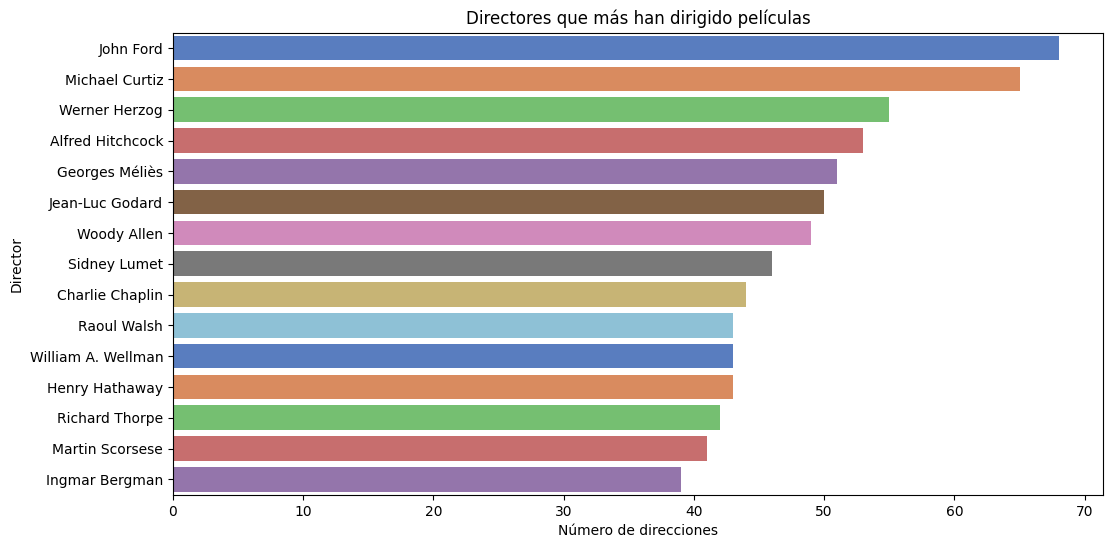

In [ ]:
# Crear un DataFrame con una fila para cada director
director_df = df['director'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).to_frame('director')
director_df['director'] = director_df['director'].str.strip()

# Contar el número de apariciones de cada director y seleccionar los 15 directores con más apariciones
top_director = director_df['director'].value_counts()[:15]

# Graficar los directores con más apariciones
plt.subplots(figsize=(12,6))
ax = sns.barplot(y=top_director.index, x=top_director.values, palette='muted')
ax.set_title('Directores que más han dirigido películas')
ax.set_xlabel('Número de direcciones')
ax.set_ylabel('Director')
plt.show()

## **Análisis Multivariado**

Se examina la relación entre tres o más variables. Analizar cómo varias variables afectan a una variable de interés

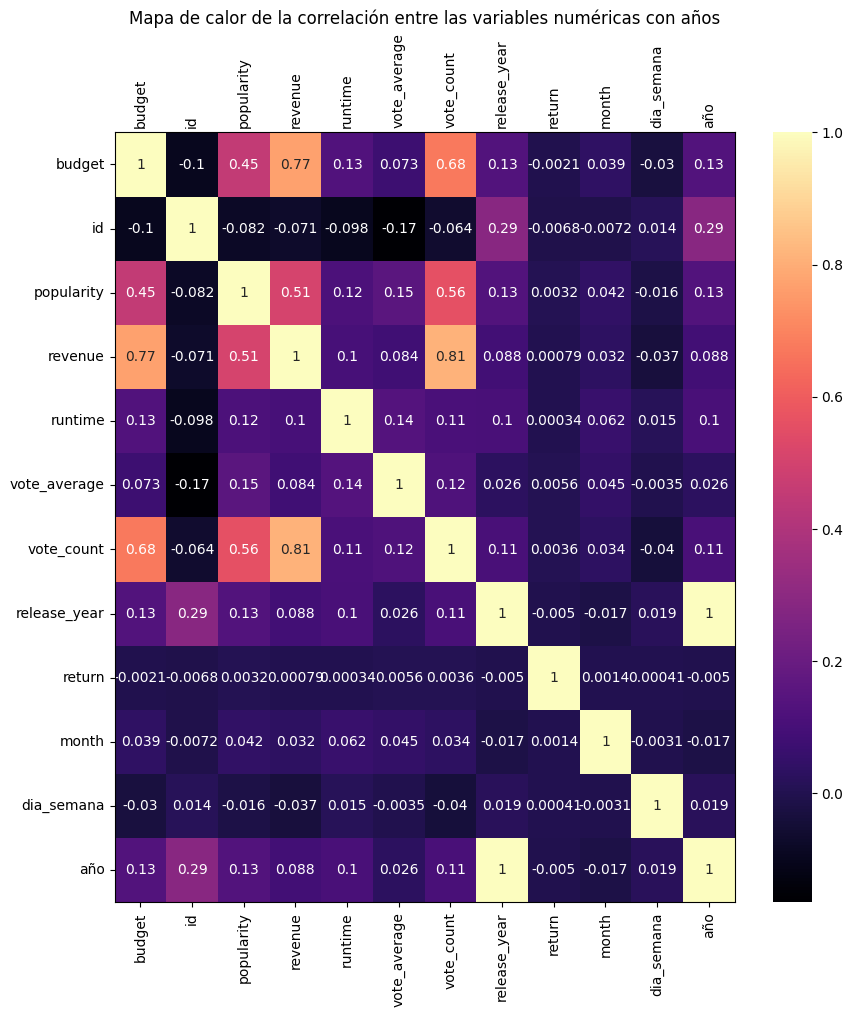

In [ ]:
# Seleccionar solo las columnas numéricas del DataFrame df_clean
df = df_clean.select_dtypes(include=[np.number])
# Eliminar filas con valores faltantes
df = df.dropna()
# Calcular la matriz de correlación entre las variables numéricas
corr = df.corr()

# Ajustar el tamaño de la figura
fig, ax = plt.subplots(figsize=(10, 10))
# Crear el mapa de calor con una paleta de colores coolwarm y etiquetas de valores de correlación
sns.heatmap(corr, cmap='magma', annot=True, ax=ax)

# Agregar un eje de tiempo en la parte superior del mapa de calor
years = corr.columns.values
ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(ax.get_xticks())
ax2.set_xticklabels(years, rotation=90)
ax2.tick_params(axis='x', which='both', length=0)

# Añadir el título del gráfico
plt.title('Mapa de calor de la correlación entre las variables numéricas con años')
# Mostrar el gráfico
plt.show()

Este mapa de calor se hace porque es posible construir un sistema de recomendación de películas utilizando solo variables numéricas. De hecho, muchos sistemas de recomendación de películas utilizan principalmente variables numéricas, como la calificación promedio de la película, el número de votos, la popularidad, el presupuesto, la duración, el género, entre otras.

El filtrado colaborativo por ejemplo utiliza la información de las interacciones pasadas de los usuarios con las películas para hacer recomendaciones. Por ejemplo, si dos usuarios han calificado positivamente películas similares en el pasado, es probable que se les recomiende películas similares en el futuro.